This code is taken from - https://krischer.github.io/seismo_live_build/html/Computational%20Seismology/The%20Finite-Difference%20Method/fd_taylor_operators_advanced_wrapper.html for learning purposes, all the credit goes to the respective owners, If i modify something I will mention it.

In [61]:
import numpy as np 
import matplotlib
matplotlib.use("nbagg")  # it allows the simulations to runs in a live jupyter notebook
import matplotlib.pyplot as plt

#How to plot subplots
from matplotlib import gridspec

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

In [79]:
import math 

def central_difference_coefficients(nop,n):  # see the notes uploaded on site
    m = np.zeros((nop,nop))                  # here we are creating a matrix that will be inverted to give the operators
    for i in range(nop):                     # basic strategy of how we will create such matrix
        for j in range(nop):                 # //  represents the floor division eg. 7//2 = 3
            dx = j - nop//2                  # the matrix looks like it is the power of the row number
            m[i,j] = dx**i
    s = np.zeros(nop)
    s[n] = math.factorial(n)                # depending on what order of derivative we want to calculate, all other will be o
                                            # also note that we assumed dx = 1 here
    oper = np.linalg.solve(m,s)             # that's one of the ways to calculate inverse of a matrix in pythone
    return oper

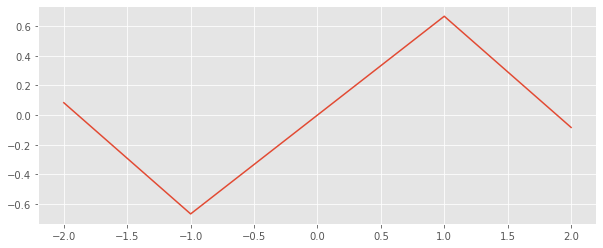

In [80]:
%matplotlib inline

# Some necessary initialization
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Give length of operator (odd)
nop = 5                     # try changing nop but keep it an odd number
# Give order of derivative (0 - interpolation, 1 - first derivative, 2 - second derivative)
n = 1                       # we can calculate perators for any order less than or equal to nop//2

# Get operator from routine 'central_difference_coefficients'
oper = central_difference_coefficients(nop, n)

# Initialize location of operator
x = np.linspace(-(nop - 1) / 2, (nop - 1) / 2, nop)   #limit of 

# Simple plot with operator
plt.figure(figsize=(10, 4))
plt.plot(x, oper)
plt.show()

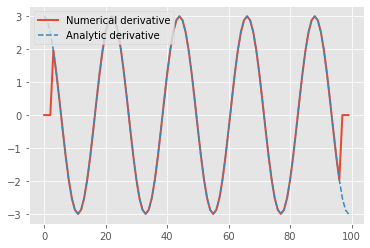

In [81]:
# Note: here you can be creative, change the function as you like, 
# as long as you know the analytical derivative 
nx = 100        # Number of points in x
x = np.linspace(0, 3 * np.pi, nx)
# comparision of numerical operator with analytical solution 
# We initialite a function f as a sin curve with wavenumber k
k = 3
f = np.sin(k * x)

# The analytical derivative is given by
dfa = k * np.cos(k * x)

# We need to know the grid spacing dx 
dx = x[2] - x[1]

# Now let's get the finite difference operator with paramters
nop = 7 # Length of operator
n = 1   #  1 st derivative
oper = central_difference_coefficients(nop, n)

# Calculate the derivative of f(x) by applying the finite-difference operator
df = np.zeros(nx)
# Loop over the central points where we calculate the derivatives
for i in range(nop // 2, nx - nop // 2):  # Avoid the boundaries
    # Loop over operator
    for j in range(0, nop):  
       df[i] = df[i] + oper[j] * f[i - (nop) // 2 + j]
           
# Scale by dx.
df /= dx ** n

plt.plot(df, label="Numerical derivative", lw=2)
plt.plot(dfa, ls="--",label="Analytic derivative")
plt.legend()
plt.show()